"""<br>
    @Author: Deven Gupta<br>
    @Date: 28-09-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 28-09-2024<br>
    @Title : Python Program to Perform EDA on IRIS Dataset<br>
<br>
"""

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Information about the Dataset

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Checking Missing Values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Checking Duplicates

In [8]:
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [10]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Visualizations

In [11]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

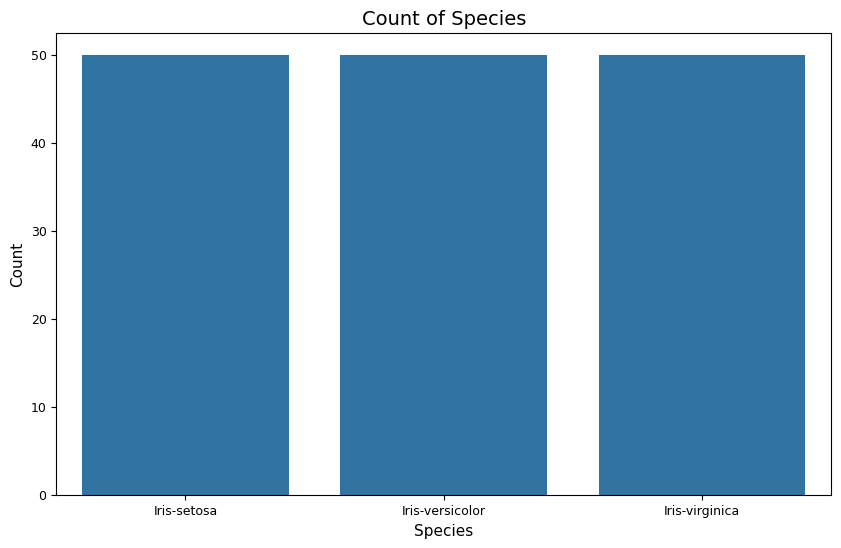

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=df, )

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Species', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of Species', fontsize=14)
plt.show()


**Observation from above graph**
<br>
<li>Each species has 50 Count i.e they have equal number of counts</li>

## Scatter Plot

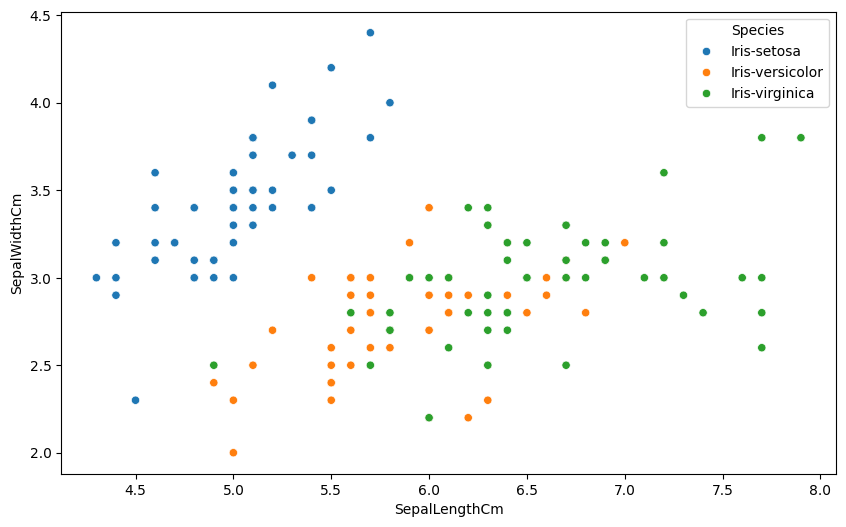

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )
plt.show()

**Observation from above graph**
<br>
<li>Species Setosa has smaller sepal lengths but larger sepal widths.</li>
<li>Versicolor Species lies in the middle of the other two species in terms of sepal length and width</li>
<li>Species Virginica has larger sepal lengths but smaller sepal widths.</li>

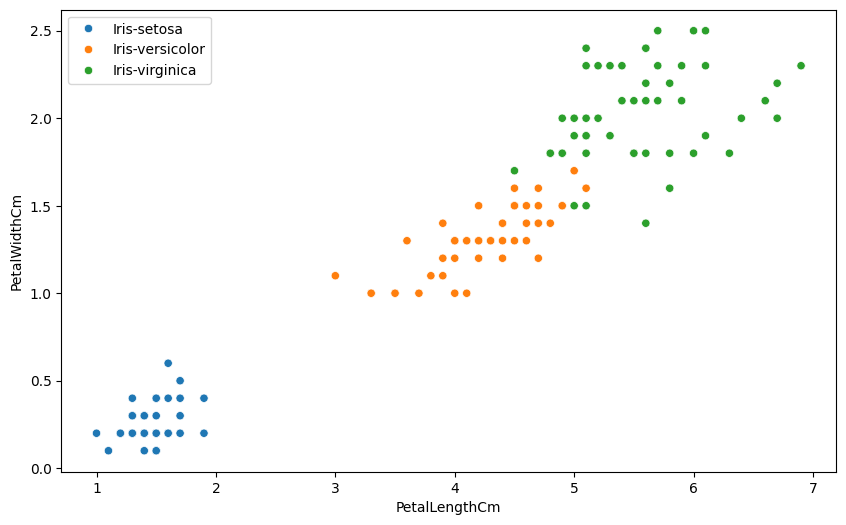

In [22]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )

plt.legend(loc='upper left')

plt.show()


**Observation from above graph**
<br>
<li>Species Setosa has smaller petal lengths and widths.</li>
<li>Versicolor Species lies in the middle of the other two species in terms of petal length and width.</li>
<li>Species Virginica has the largest of petal lengths and widths.</li>

## Pair Plot

<Figure size 1000x600 with 0 Axes>

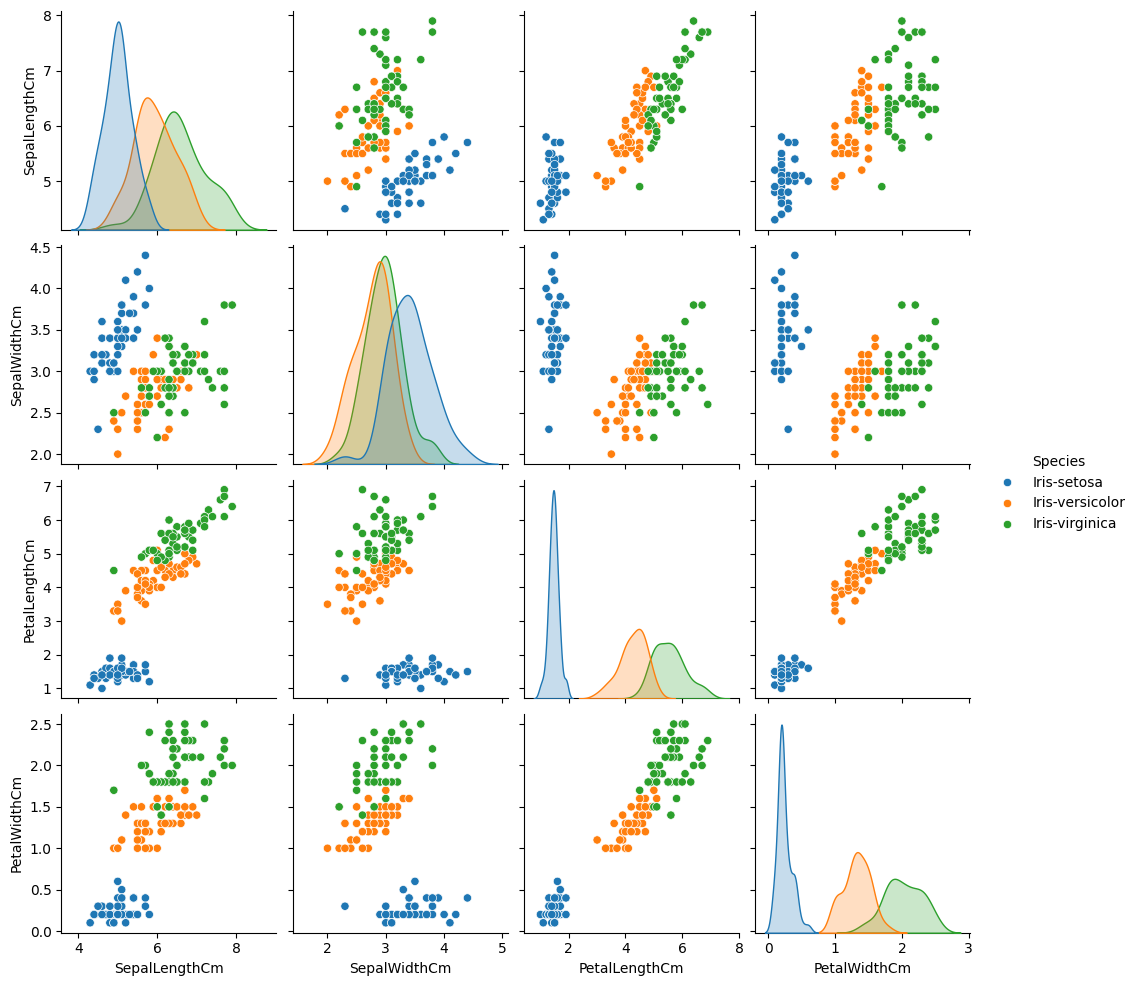

In [46]:
plt.figure(figsize=(10, 6))
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species')


**Observation from above plot**
<li>The pair plot reveals clear separations, especially between Setosa and the other two species.
<li>Versicolor and Virginica show some overlap, particularly in petal dimensions.

## Heatmap plot (Correlation Heatmap)

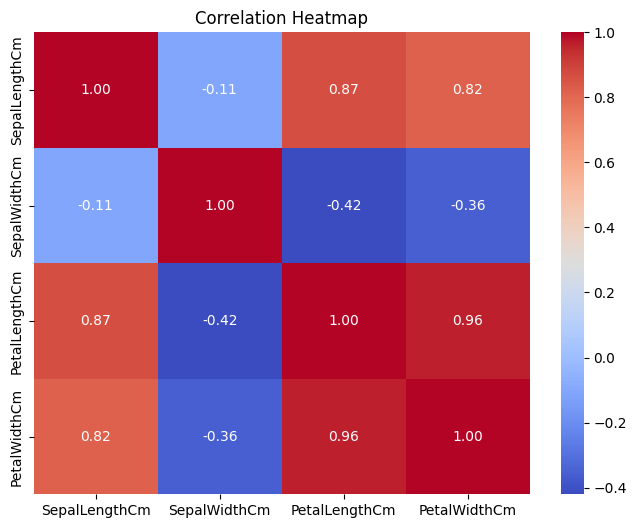

In [50]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop(columns=['Id','Species']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Observation from above Plot**
<li>Strong positive correlation between petal length and petal width (0.96).
<li>Moderate correlation between sepal length and petal length (0.87).

## Box Plot

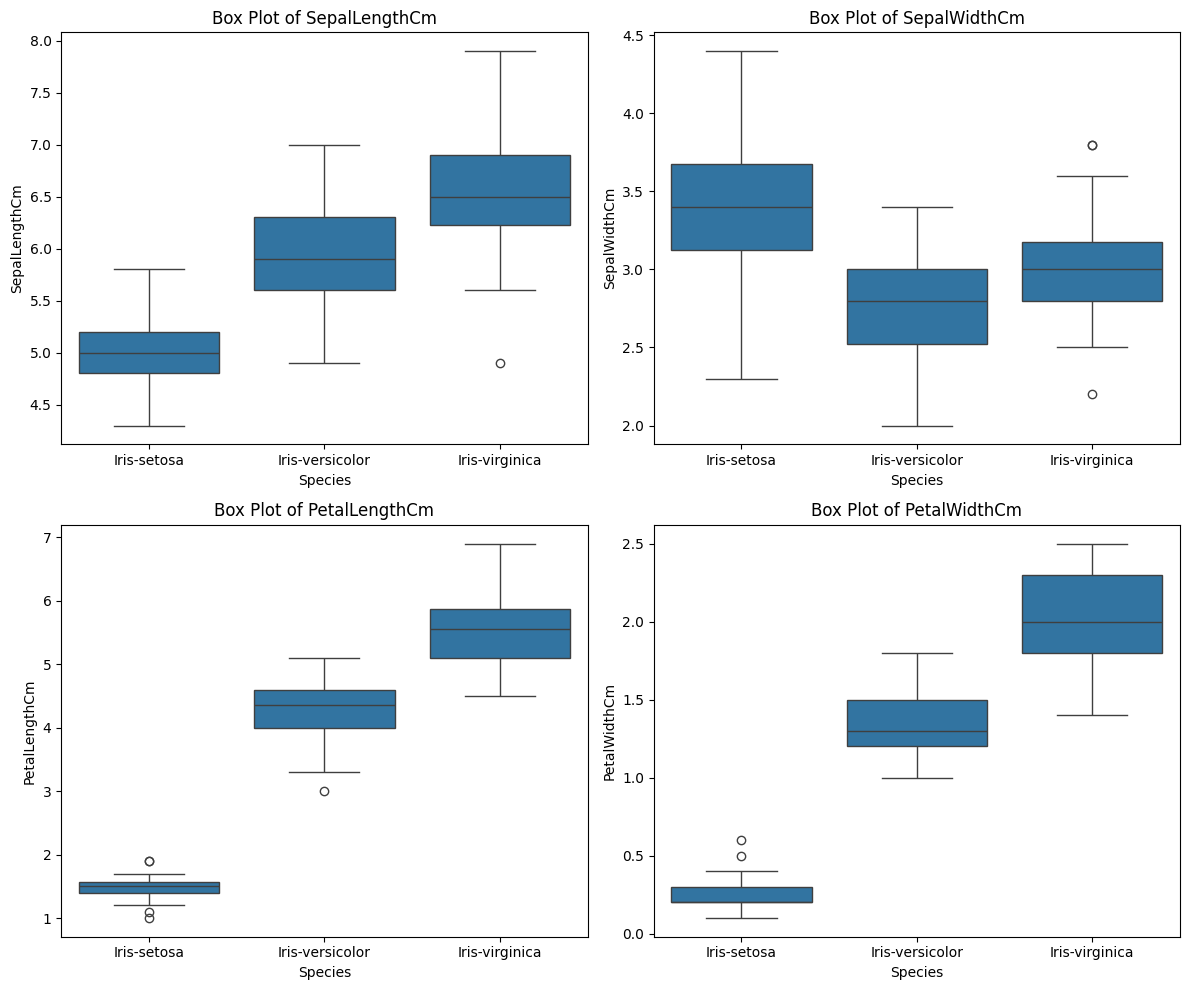

In [52]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[1:5]):  # Exclude Id and Species for box plots
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


**Observation from above plot**
<li>Setosa has noticeably smaller petal dimensions compared to Versicolor and Virginica.
<li>Some overlap exists between Versicolor and Virginica in sepal dimensions.

## Voilin plot

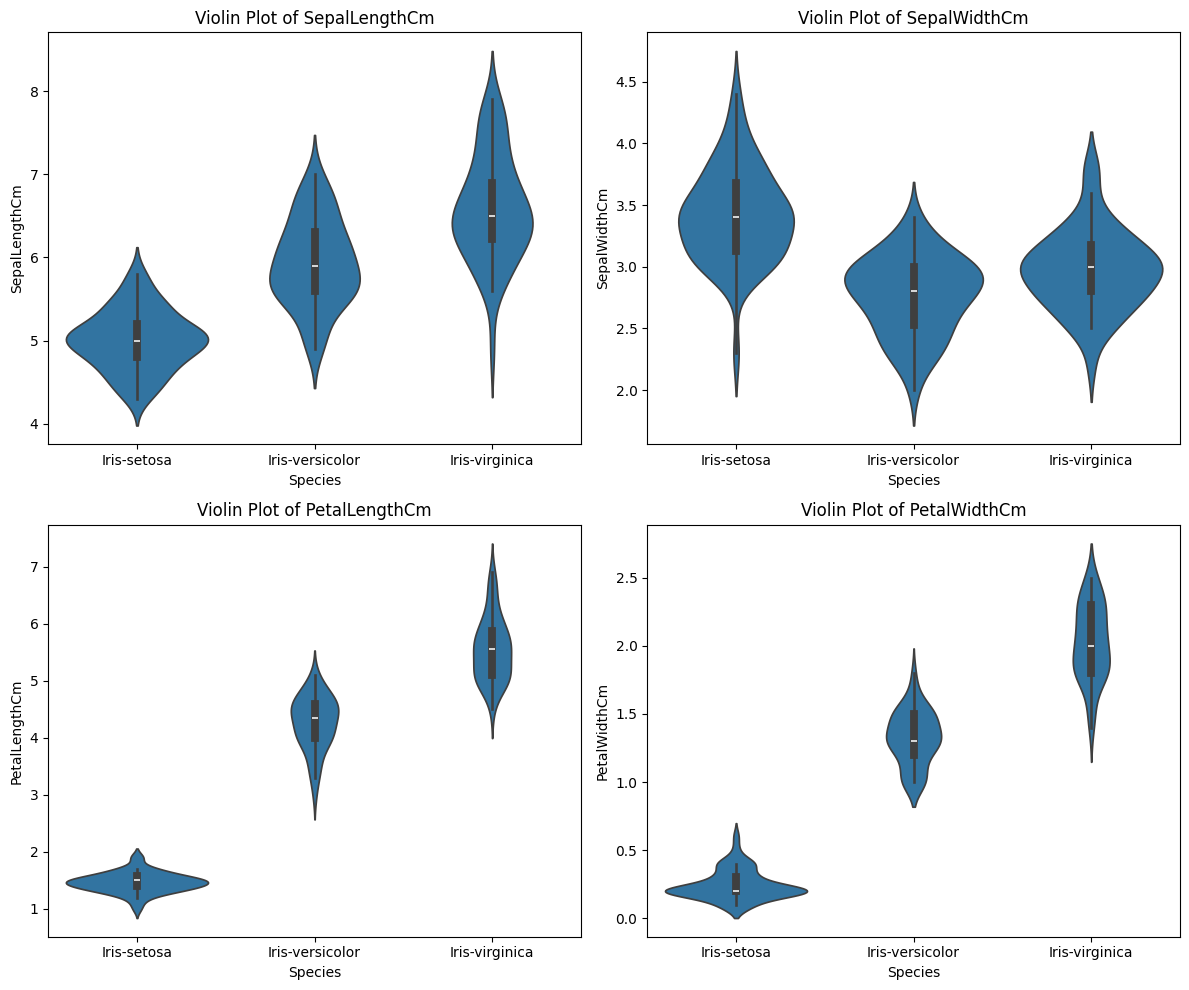

In [54]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[1:5]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


**Observation from above plot**
<li>Violin plots show the distribution of each feature across species.
<li>Setosa exhibits a more compact distribution for petal dimensions, while Versicolor and Virginica have wider spreads.

In [40]:
data.select_dtypes(include=['number']).corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


<Axes: xlabel='SepalWidthCm'>

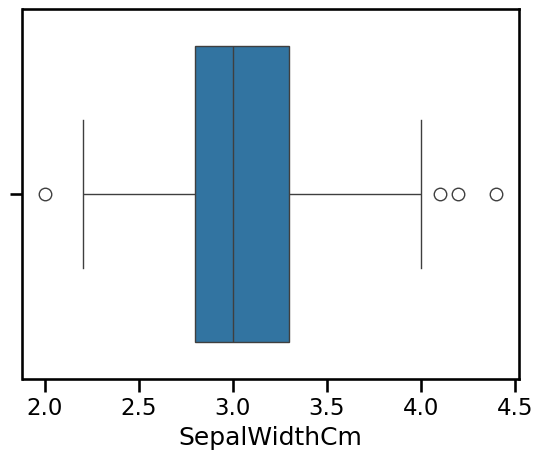

In [43]:
# Load the dataset
df = pd.read_csv('Iris.csv')

sns.boxplot(x='SepalWidthCm', data=df)


## Remove Outliers

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

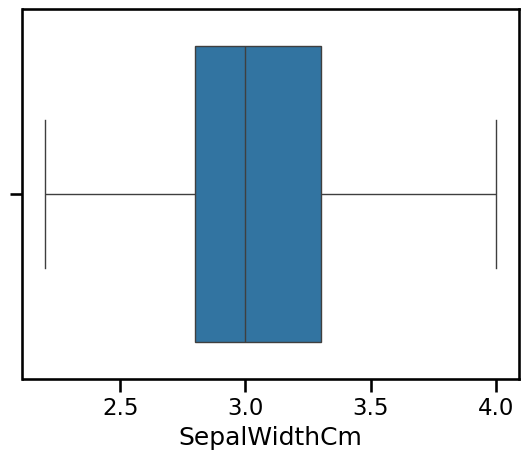

In [44]:
# Importing
import numpy as np

# Load the dataset 
df = pd.read_csv('Iris.csv') 

# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
                interpolation = 'midpoint') 

Q3 = np.percentile(df['SepalWidthCm'], 75, 
                interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape) 

# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 

# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 

# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 

print("New Shape: ", df.shape) 

sns.boxplot(x='SepalWidthCm', data=df)
